In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook

#load the files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

#size of training dataset
train_samples = train.shape[0]

In [18]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [19]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
X_train = train[['Pclass','Age','SibSp','Parch','Fare','Sex', 'Embarked']]
y_train = train[['Survived']]

# feature engineering
X_train = X_train.fillna(X_train.mean()) #(method='ffill')
X_train.Sex = X_train.Sex.map({'female':1, 'male':0})
X_train.Embarked.fillna('U', inplace=True)
X_train.Embarked = X_train.Embarked.map({'S':0,'C':1,'Q':2,'U':3})

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Note the way of scalin (df[df.columns])
# we want to mantain the dataframe (instead of numpy array)
X_train[X_train.columns] = MinMaxScaler().fit_transform(X_train[X_train.columns])

<IPython.core.display.Javascript object>


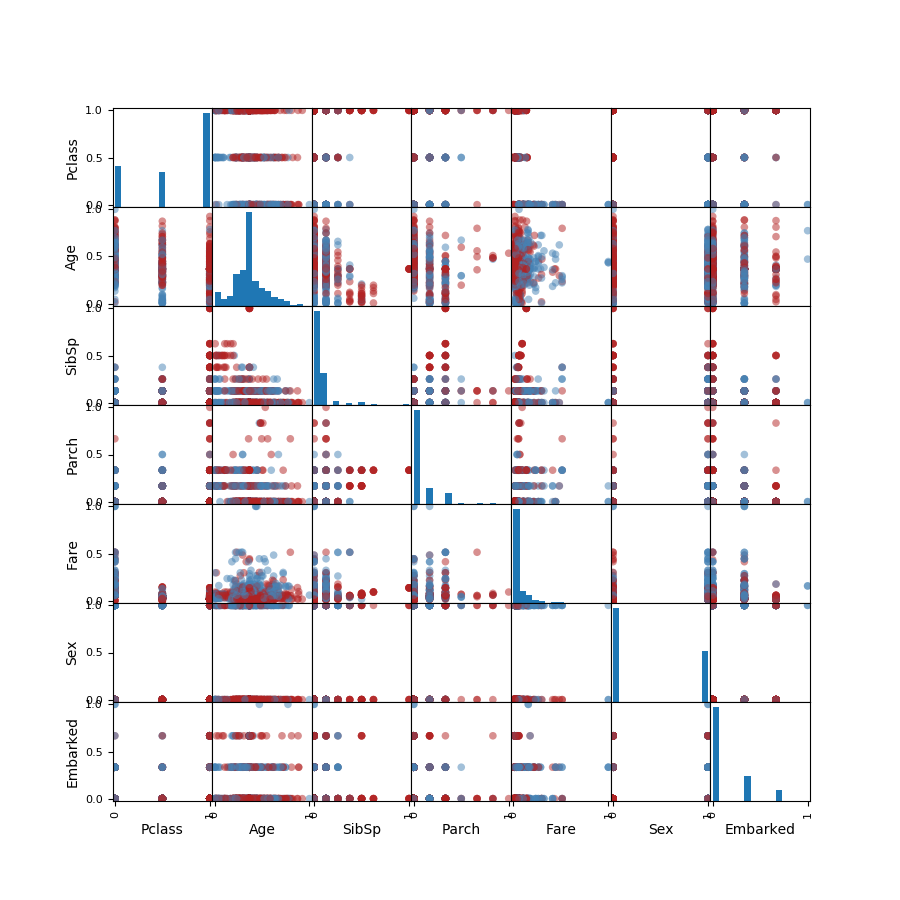

In [67]:
# plotting a scatter matrix
colormap = {0:'firebrick',1:'steelblue'}
colors = y_train.Survived.map(colormap)

pd.plotting.scatter_matrix(X_train, c=colors, marker = 'o', s=30,
                           hist_kwds={'bins':15}, figsize=(9,9));



In [32]:
#baseline
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X_traind, X_val, y_traind, y_val = train_test_split(X_train, y_train, random_state=0)

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
#be aware of y as column vector
dummy.fit(X_traind, y_traind.values.reshape(-1))
dummy.score(X_val.values, y_val.values.reshape(-1))


0.62331838565022424

In [34]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_val, dummy.predict(X_val), target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.62      1.00      0.77       139
    Survived       0.00      0.00      0.00        84

 avg / total       0.39      0.62      0.48       223



/Users/samuel/anaconda/envs/py3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
